# Feature selection

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt



In [4]:
our_dat_file = pd.read_csv("data/_districts_edfacts_assessments_sample_sample.csv")

In [6]:
our_dat_file.head(2)

,rowid,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,9321,3630630,3630630,2010,WEST GENESEE CENTRAL SCHOOL DISTRICT,36,9,99,99,99,...,99,99,400,99,100,99.5,401,99,100,99.5
1,13540,903660,903660,2009,REGIONAL SCHOOL DISTRICT 05,9,7,1,99,99,...,99,99,347,96,96,96.0,347,99,100,99.5


In [7]:
our_dat_file.columns

Index(['rowid', 'leaid', 'leaid_num', 'year', 'lea_name', 'fips',
       'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant',
       'disability', 'econ_disadvantaged', 'foster_care', 'military_connected',
       'read_test_num_valid', 'read_test_pct_prof_low',
       'read_test_pct_prof_high', 'read_test_pct_prof_midpt',
       'math_test_num_valid', 'math_test_pct_prof_low',
       'math_test_pct_prof_high', 'math_test_pct_prof_midpt'],
      dtype='object')

In [14]:
filtered_grad = our_dat_file[our_dat_file["read_test_num_valid"] > 299] 
filtered_grad.head(2)

,rowid,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,9321,3630630,3630630,2010,WEST GENESEE CENTRAL SCHOOL DISTRICT,36,9,99,99,99,...,99,99,400,99,100,99.5,401,99,100,99.5
1,13540,903660,903660,2009,REGIONAL SCHOOL DISTRICT 05,9,7,1,99,99,...,99,99,347,96,96,96.0,347,99,100,99.5


In [26]:
race_filtered = filtered_grad.loc[(filtered_grad['race'] == 99 ) & (filtered_grad['sex'] == 99)& (filtered_grad['year'] > 2008)  ]
# what is leap?

race_filtered.head(2)

,rowid,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,9321,3630630,3630630,2010,WEST GENESEE CENTRAL SCHOOL DISTRICT,36,9,99,99,99,...,99,99,400,99,100,99.5,401,99,100,99.5
6,67222,3629520,3629520,2012,VALLEY STREAM CENTRAL HIGH SCHOOL DISTRICT,36,9,99,99,99,...,99,99,762,99,100,99.5,767,99,100,99.5


In [28]:
# Columns we want
valid_columns = ['leaid', 'leaid_num', 'year', 'lea_name', 'fips',
       'grade_edfacts', 'lep', 'homeless', 'migrant',
       'disability', 'econ_disadvantaged', 'foster_care', 'military_connected',
       'read_test_num_valid', 'read_test_pct_prof_low',
       'read_test_pct_prof_high', 'read_test_pct_prof_midpt',
       'math_test_num_valid', 'math_test_pct_prof_low',
       'math_test_pct_prof_high', 'math_test_pct_prof_midpt']
filtered_columns  = race_filtered.filter(valid_columns)

filtered_columns.head()

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,lep,homeless,migrant,disability,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,3630630,3630630,2010,WEST GENESEE CENTRAL SCHOOL DISTRICT,36,9,99,99,99,99,...,99,99,400,99,100,99.5,401,99,100,99.5
6,3629520,3629520,2012,VALLEY STREAM CENTRAL HIGH SCHOOL DISTRICT,36,9,99,99,99,99,...,99,99,762,99,100,99.5,767,99,100,99.5
10,4817760,4817760,2016,EANES ISD,48,8,99,99,99,99,...,99,99,642,99,100,99.5,944,99,100,99.5
25,901560,901560,2010,FARMINGTON SCHOOL DISTRICT,9,8,99,99,99,99,...,99,99,343,95,95,95.0,345,98,98,98.0
27,2006420,2006420,2011,Gardner Edgerton,20,5,99,99,99,99,...,99,99,388,95,95,95.0,386,98,98,98.0


In [36]:
filtered_columns[['leaid', 'leaid_num', 'lea_name', 'fips',
       'grade_edfacts', 'lep', 'homeless', 'migrant',
       'disability', 'econ_disadvantaged', 'foster_care', 'military_connected',
       'read_test_num_valid', 'read_test_pct_prof_low',
       'read_test_pct_prof_high', 'read_test_pct_prof_midpt',
       'math_test_num_valid', 'math_test_pct_prof_low',
       'math_test_pct_prof_high', 'math_test_pct_prof_midpt']].describe()

#filtered_columns['read_test_pct_prof_midpt'].quantile([0.9,0.95,0.99])

#print(len(filtered_columns))


,leaid,leaid_num,fips,grade_edfacts,lep,homeless,migrant,disability,econ_disadvantaged,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
count,4.400000e+01,4.400000e+01,44.000000,44.00000,44.0,44.0,44.0,44.0,44.000000,44.0,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,3.138822e+06,3.138822e+06,31.227273,21.25000,99.0,99.0,99.0,99.0,87.863636,99.0,99.0,855.795455,94.022727,94.136364,94.079545,866.772727,96.545455,96.727273,96.636364
std,1.350587e+06,1.350587e+06,13.466347,34.26309,0.0,0.0,0.0,0.0,31.461746,0.0,0.0,789.519476,4.315945,4.459591,4.385419,793.428881,1.265914,1.484237,1.322276
min,8.019200e+05,8.019200e+05,8.000000,3.00000,99.0,99.0,99.0,99.0,1.000000,99.0,99.0,317.000000,79.000000,79.000000,79.000000,271.000000,95.000000,95.000000,95.000000
25%,1.939370e+06,1.939370e+06,19.250000,5.00000,99.0,99.0,99.0,99.0,99.000000,99.0,99.0,398.500000,91.000000,91.000000,91.000000,397.250000,95.750000,96.000000,96.000000
50%,3.611805e+06,3.611805e+06,36.000000,8.00000,99.0,99.0,99.0,99.0,99.000000,99.0,99.0,588.000000,95.000000,95.000000,95.000000,595.500000,96.000000,96.000000,96.000000
75%,3.983355e+06,3.983355e+06,39.750000,9.00000,99.0,99.0,99.0,99.0,99.000000,99.0,99.0,866.500000,97.250000,97.250000,97.250000,934.750000,98.000000,98.000000,98.000000
max,4.830600e+06,4.830600e+06,48.000000,99.00000,99.0,99.0,99.0,99.0,99.000000,99.0,99.0,3765.000000,99.000000,100.000000,99.500000,3763.000000,99.000000,100.000000,99.500000


In [32]:
filtered_columns['read_test_pct_prof_midpt'].quantile([0.9,0.95,0.99])

0.90    99.05
0.95    99.50
0.99    99.50
Name: read_test_pct_prof_midpt, dtype: float64

In [34]:
filtered_columns['read_test_pct_prof_midpt'].describe()

count    44.000000
mean     94.079545
std       4.385419
min      79.000000
25%      91.000000
50%      95.000000
75%      97.250000
max      99.500000
Name: read_test_pct_prof_midpt, dtype: float64

In [ ]:
# 1 get distributions and understand the data
# 2. Investigating correlations

plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(x='bedrooms',y = 'read_test_pct_prof_midpt', data = listings)
plt.ylabel("price")
plt.title("Scatterplot of Price vs. Bedrooms")
plt.subplot(122)
sns.boxplot(x='bedrooms',y= 'price', data = listings)
plt.ylabel("price")
plt.title("Boxplot of Price vs. Bedrooms")

AttributeError: module 'seaborn' has no attribute 'plt'

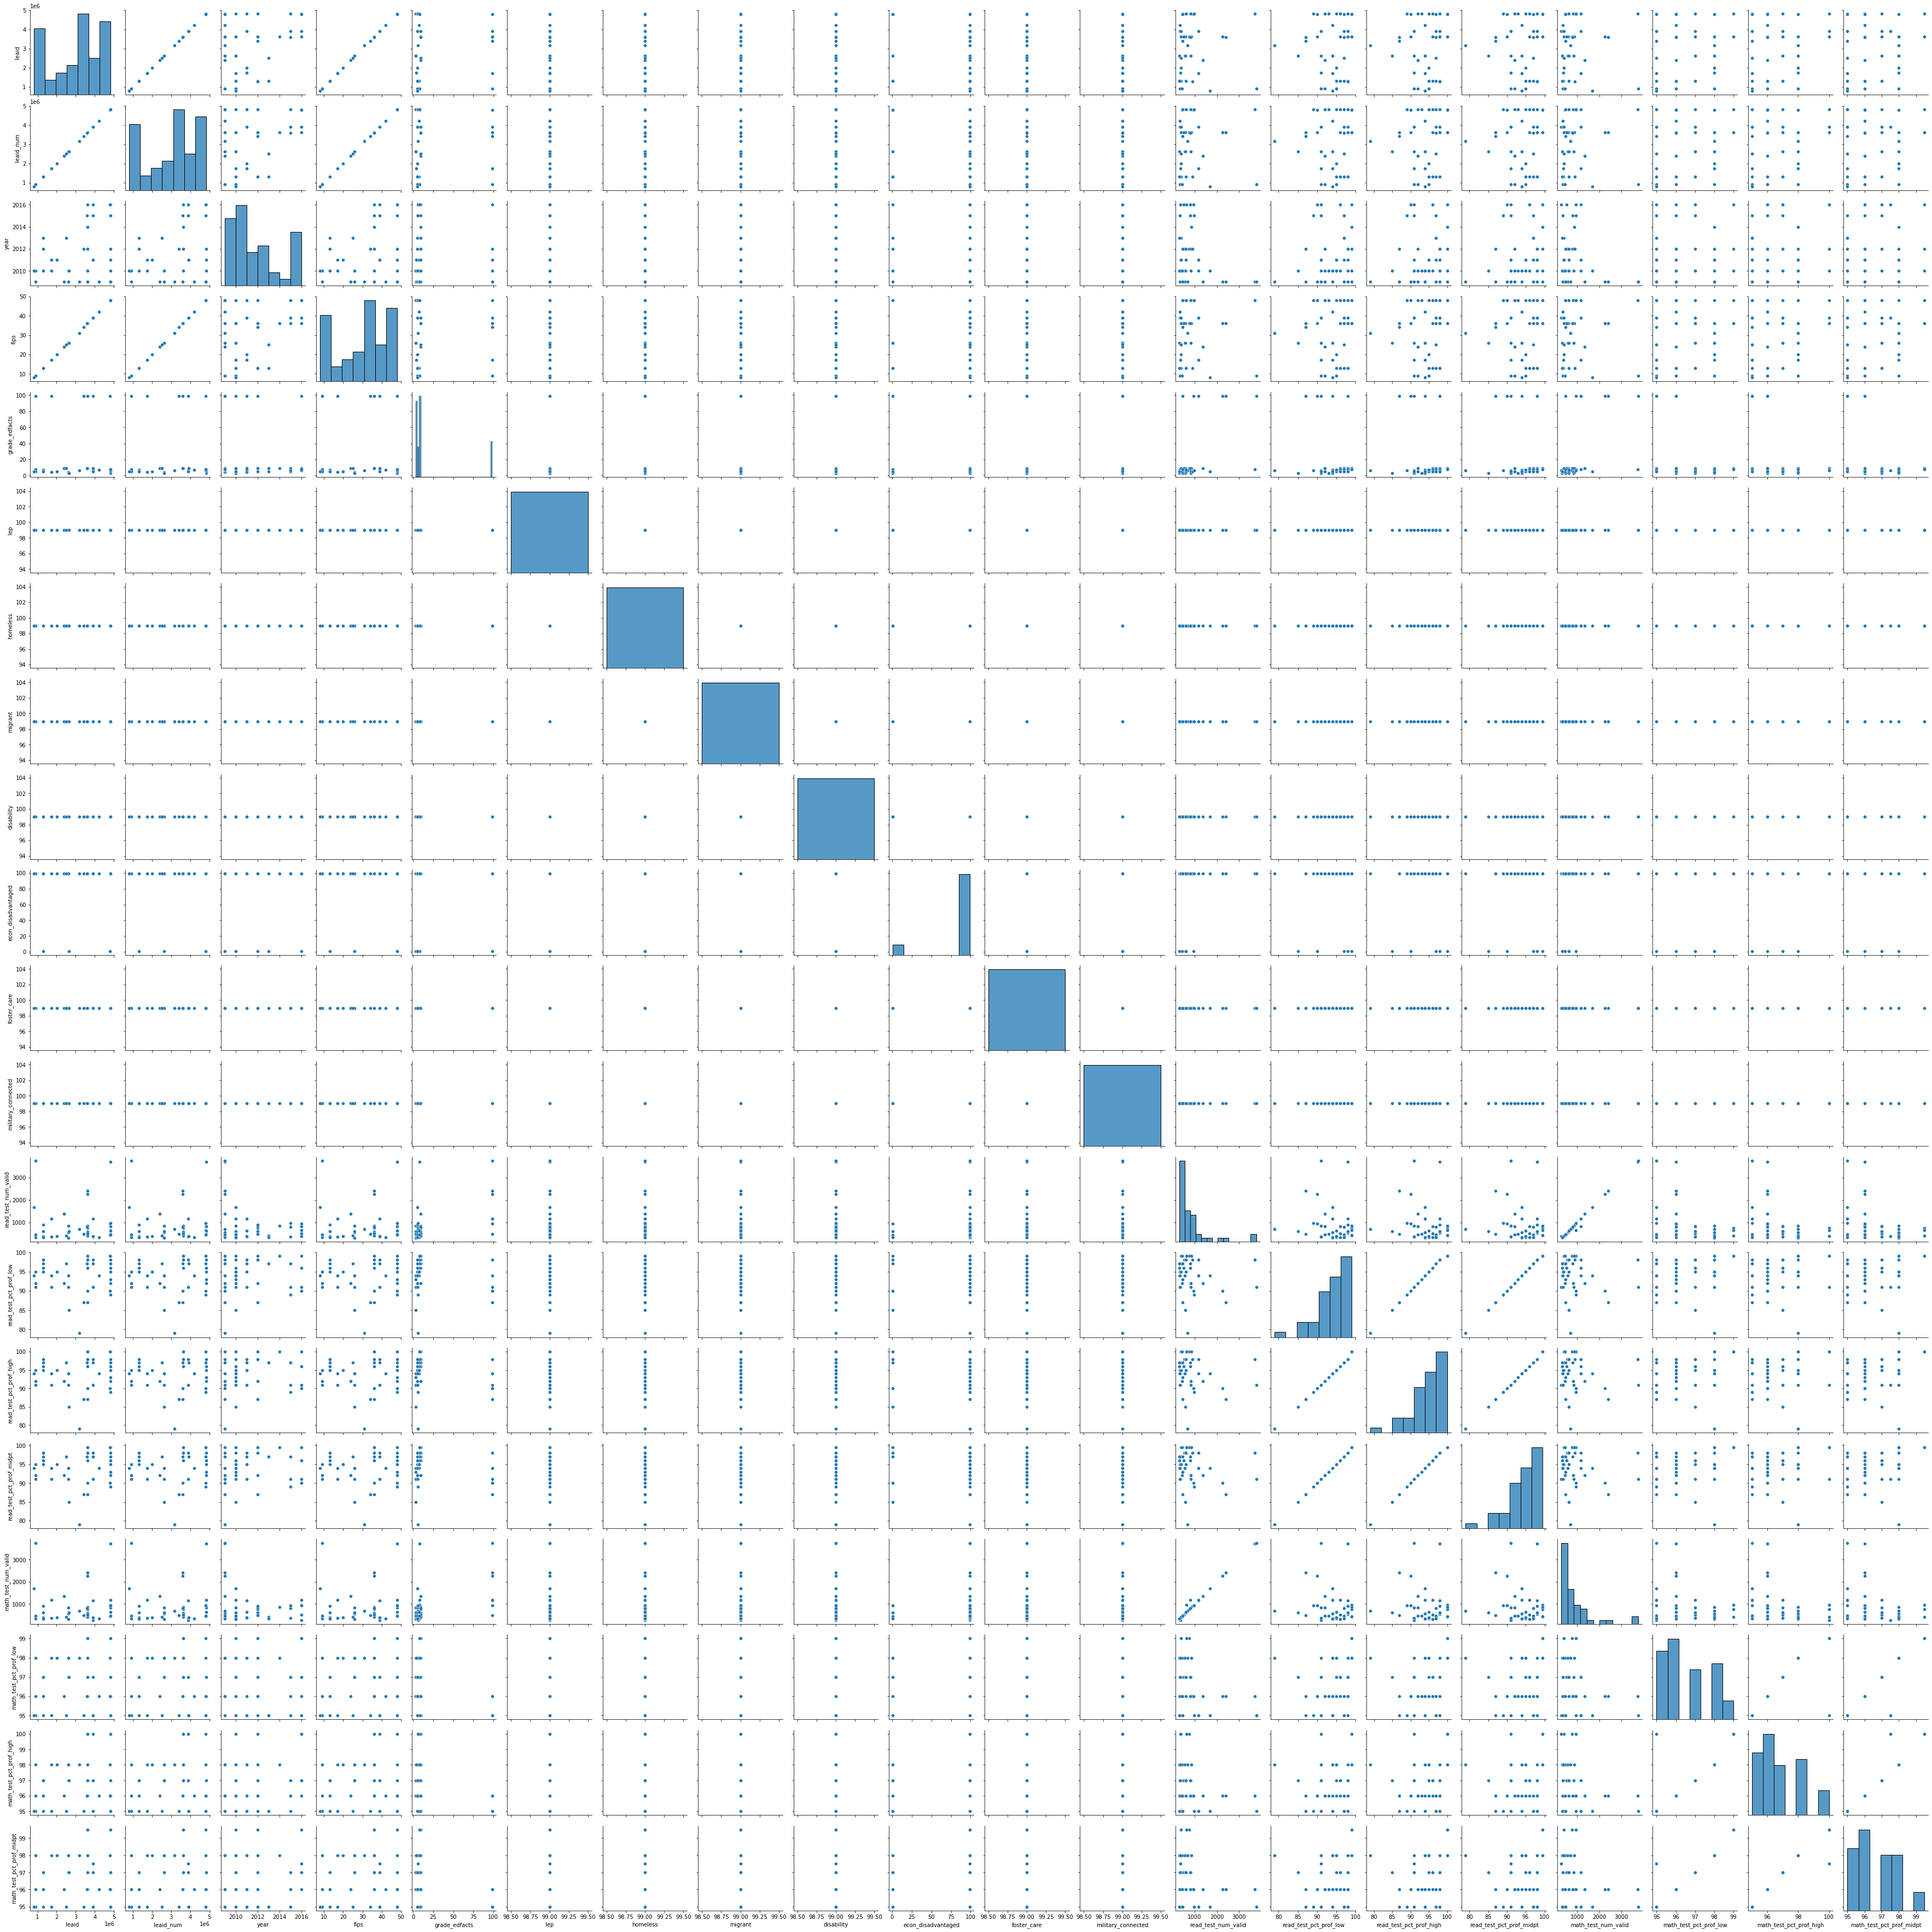

In [37]:
# Seaborn cor
# https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
 
# Basic correlogram
sns.pairplot(filtered_columns)
sns.plt.show()
